<a href="https://colab.research.google.com/github/shikhers16/CIFAR10/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf


In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.datasets import cifar10

In [0]:
from keras.utils import to_categorical

In [0]:
import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline

# Plot the Neural network fitting history function Definition
def history_plot(fit_history, n):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(211)
    plt.plot(fit_history.history['loss'][n:], color='red', label = 'train')
    plt.plot(fit_history.history['val_loss'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title('Loss Function');  
    
    plt.subplot(212)
    plt.plot(fit_history.history['acc'][n:], color='red', label = 'train')
    plt.plot(fit_history.history['val_acc'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")    
    plt.legend()
    plt.title('Accuracy');

In [0]:
times = []
histories = []

In [6]:
#Loading Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 100s 1us/step


In [0]:
#Normalizing Data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [0]:
#Creating class matrices
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


In [40]:
#creating model and adding layers
model = Sequential()

#Block 1
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

#Block 2
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

#Flatten
model.add(Flatten())

#Dense Layers
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

#Softmax Layer
model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 256)         0         
__________

In [0]:
#compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
import time

In [0]:
from pathlib import Path

In [42]:
#training
t1_gpu = time.time()
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 30, validation_data = (X_test, Y_test), shuffle = True)
t2_gpu = time.time()

time_gpu = t2_gpu - t1_gpu
print(time_gpu)




Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 23s 457us/step - loss: 1.6502 - acc: 0.3909 - val_loss: 1.2756 - val_acc: 0.5398
Epoch 2/30
50000/50000 [==============================] - 22s 438us/step - loss: 1.1703 - acc: 0.5831 - val_loss: 0.9600 - val_acc: 0.6623
Epoch 3/30
50000/50000 [==============================] - 22s 441us/step - loss: 0.9680 - acc: 0.6601 - val_loss: 0.8646 - val_acc: 0.6944
Epoch 4/30
50000/50000 [==============================] - 22s 441us/step - loss: 0.8399 - acc: 0.7041 - val_loss: 0.7498 - val_acc: 0.7381
Epoch 5/30
50000/50000 [==============================] - 22s 439us/step - loss: 0.7486 - acc: 0.7398 - val_loss: 0.7120 - val_acc: 0.7544
Epoch 6/30
50000/50000 [==============================] - 22s 436us/step - loss: 0.6869 - acc: 0.7612 - val_loss: 0.6765 - val_acc: 0.7697
Epoch 7/30
50000/50000 [==============================] - 22s 437us/step - loss: 0.6284 - acc: 0.7795 - val_loss: 0.

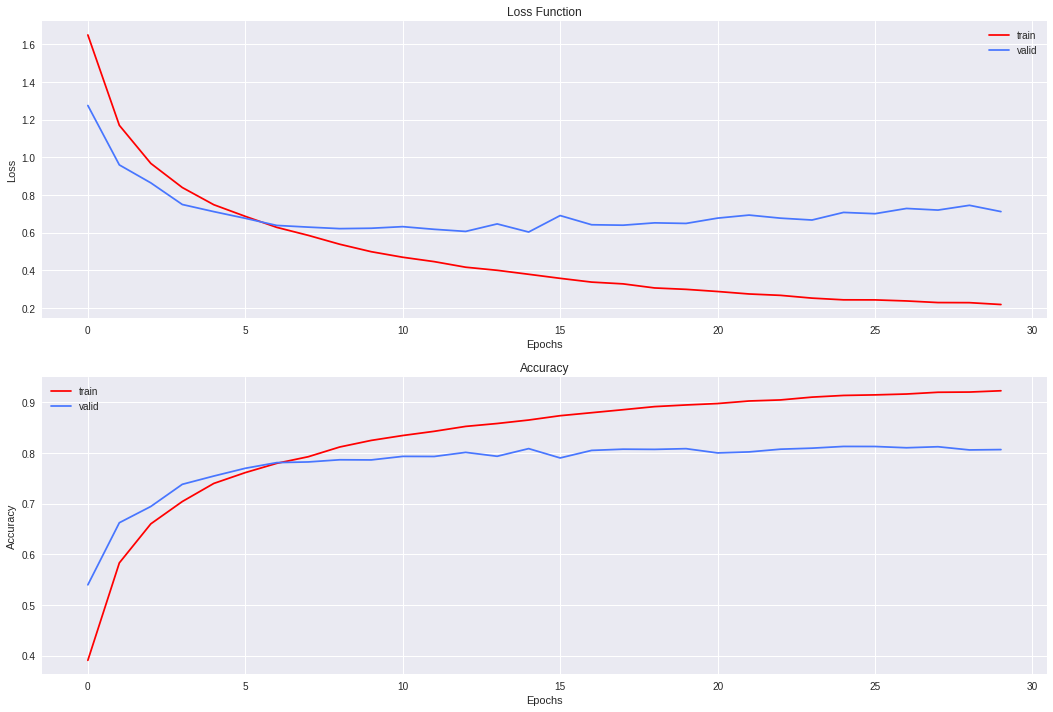

In [43]:
#Plotting the training progress
history_plot(history, 0)

In [0]:
histories.append(history)
times.append(time_gpu)

In [0]:
 #Save neural network Structure
model_structure = model.to_json()
f = Path('model_structure_gpu.json')
f.write_text(model_structure)

#Save NN weights
model.save_weights("model_weights_gpu.h5")

In [0]:
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]


In [0]:
from keras.models import model_from_json
from keras.preprocessing import image

In [0]:
img = image.load_img('mycat.jpg', target_size = (32, 32))

In [0]:
img_a = image.img_to_array(img)

In [0]:
imgs = np.expand_dims(img_a, axis = 0)

In [66]:
results = model.predict(imgs)
result = results[0]
class_idx = np.argmax(result)
class_val = result[class_idx]
class_label = class_labels[class_idx]
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_val))

This is image is a Cat - Likelihood: 1.000000
